<a href="https://colab.research.google.com/github/Akshay-Khetre/Data_Visualisation/blob/main/Iris_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [5]:
data ='/content/Iris.csv'


df = pd.read_csv(data, header=None)

In [6]:
df.shape

(151, 6)

In [7]:
df.head()

,0,1,2,3,4,5
0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       151 non-null    object
 1   1       151 non-null    object
 2   2       151 non-null    object
 3   3       151 non-null    object
 4   4       151 non-null    object
 5   5       151 non-null    object
dtypes: object(6)
memory usage: 7.2+ KB


In [12]:
col_names = ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

df.columns = col_names
for col in col_names:
    
    print(df[col].value_counts())

Id     1
95     1
97     1
98     1
99     1
      ..
51     1
52     1
53     1
54     1
150    1
Name: Id, Length: 151, dtype: int64
5                10
5.1               9
6.3               9
6.7               8
5.7               8
6.4               7
5.8               7
5.5               7
4.9               6
5.4               6
5.6               6
6.1               6
6                 6
6.5               5
4.8               5
6.2               4
6.9               4
7.7               4
5.2               4
4.6               4
7.2               3
5.9               3
4.4               3
6.8               3
6.6               2
4.7               2
7.3               1
7.6               1
7.4               1
SepalLengthCm     1
7.1               1
7                 1
5.3               1
4.5               1
4.3               1
7.9               1
Name: SepalLengthCm, dtype: int64
3               26
2.8             14
3.2             13
3.1             12
3.4             12
2.9             

In [14]:
df['Species'].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Species             1
Name: Species, dtype: int64

In [15]:
df.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [16]:
X = df.drop(['Species'], axis=1)

y = df['Species']

In [17]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [18]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((101, 5), (50, 5))

In [19]:
X_train.dtypes

Id               object
SepalLengthCm    object
SepalWidthCm     object
PetalLengthCm    object
PetalWidthCm     object
dtype: object

In [20]:
X_train.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
65,65,5.6,2.9,3.6,1.3
139,139,6,3,4.8,1.8
108,108,7.3,2.9,6.3,1.8
112,112,6.4,2.7,5.3,1.9
0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm


In [22]:
!pip install category_encoders


     |████████████████████████████████| 86 kB 3.2 MB/s 


In [23]:
import category_encoders as ce


In [24]:
encoder = ce.OrdinalEncoder(cols=['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [25]:
X_train.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
65,1,1,1,1,1
139,2,2,2,2,2
108,3,3,1,3,2
112,4,4,3,4,3
0,5,5,4,5,4


In [26]:
X_test.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
76,-1.0,29.0,2.0,32.0,5
18,-1.0,8.0,6.0,24.0,16
82,-1.0,22.0,22.0,-1.0,9
81,-1.0,22.0,22.0,-1.0,17
143,-1.0,10.0,3.0,11.0,3


In [27]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [28]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [29]:
y_pred_gini = clf_gini.predict(X_test)


In [30]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7600


In [31]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iri

In [32]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7921


In [33]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7921
Test set score: 0.7600


[Text(0.4444444444444444, 0.875, 'X[4] <= 6.5\ngini = 0.672\nsamples = 101\nvalue = [31, 36, 33, 1]'),
 Text(0.2222222222222222, 0.625, 'X[4] <= 1.5\ngini = 0.508\nsamples = 36\nvalue = [0, 21, 14, 1]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 10\nvalue = [0, 10, 0, 0]'),
 Text(0.3333333333333333, 0.375, 'X[4] <= 3.5\ngini = 0.53\nsamples = 26\nvalue = [0, 11, 14, 1]'),
 Text(0.2222222222222222, 0.125, 'gini = 0.153\nsamples = 12\nvalue = [0, 1, 11, 0]'),
 Text(0.4444444444444444, 0.125, 'gini = 0.439\nsamples = 14\nvalue = [0, 10, 3, 1]'),
 Text(0.6666666666666666, 0.625, 'X[4] <= 8.5\ngini = 0.634\nsamples = 65\nvalue = [31, 15, 19, 0]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 19\nvalue = [19, 0, 0, 0]'),
 Text(0.7777777777777778, 0.375, 'X[4] <= 10.5\ngini = 0.655\nsamples = 46\nvalue = [12, 15, 19, 0]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 11\nvalue = [0, 11, 0, 0]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.575\nsamples = 35\n

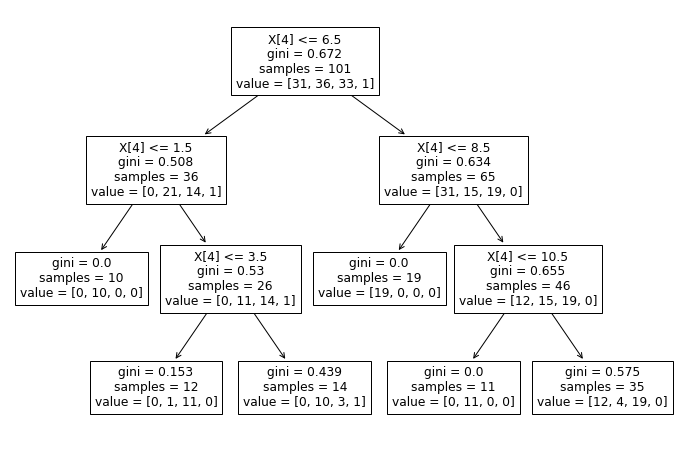

In [34]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

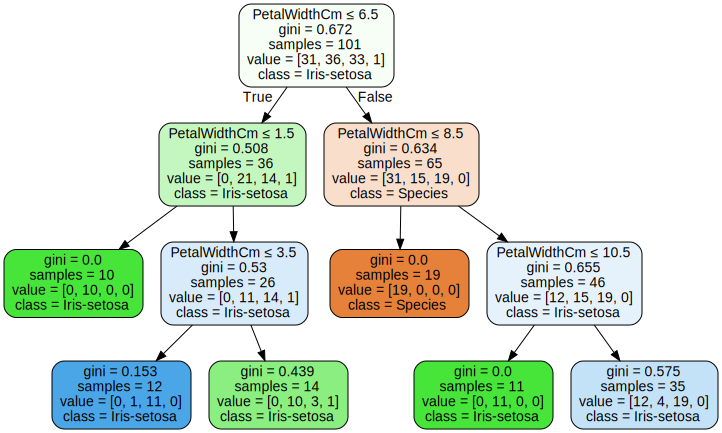

In [35]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [36]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [37]:
y_pred_en = clf_en.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7600


In [39]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris

In [40]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7921


In [41]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7921
Test set score: 0.7600


[Text(0.4444444444444444, 0.875, 'X[4] <= 6.5\nentropy = 1.647\nsamples = 101\nvalue = [31, 36, 33, 1]'),
 Text(0.2222222222222222, 0.625, 'X[4] <= 1.5\nentropy = 1.127\nsamples = 36\nvalue = [0, 21, 14, 1]'),
 Text(0.1111111111111111, 0.375, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10, 0, 0]'),
 Text(0.3333333333333333, 0.375, 'X[4] <= 4.5\nentropy = 1.187\nsamples = 26\nvalue = [0, 11, 14, 1]'),
 Text(0.2222222222222222, 0.125, 'entropy = 0.773\nsamples = 13\nvalue = [0, 1, 11, 1]'),
 Text(0.4444444444444444, 0.125, 'entropy = 0.779\nsamples = 13\nvalue = [0, 10, 3, 0]'),
 Text(0.6666666666666666, 0.625, 'X[4] <= 8.5\nentropy = 1.516\nsamples = 65\nvalue = [31, 15, 19, 0]'),
 Text(0.5555555555555556, 0.375, 'entropy = 0.0\nsamples = 19\nvalue = [19, 0, 0, 0]'),
 Text(0.7777777777777778, 0.375, 'X[4] <= 10.5\nentropy = 1.56\nsamples = 46\nvalue = [12, 15, 19, 0]'),
 Text(0.6666666666666666, 0.125, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11, 0, 0]'),
 Text(0.8888888888888888, 0.125,

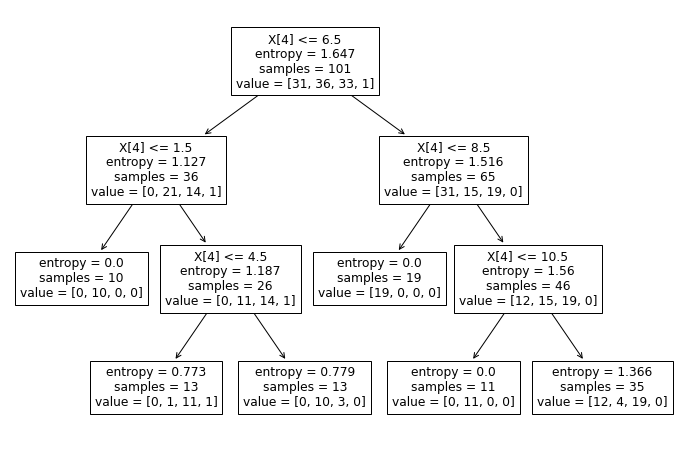

In [42]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

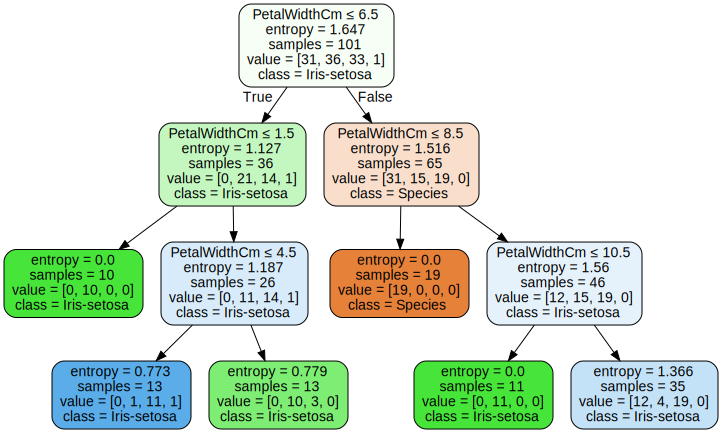

In [43]:
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 


In [44]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[10  0  9]
 [ 0 11  3]
 [ 0  0 17]]


In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.53      0.69        19
Iris-versicolor       1.00      0.79      0.88        14
 Iris-virginica       0.59      1.00      0.74        17

       accuracy                           0.76        50
      macro avg       0.86      0.77      0.77        50
   weighted avg       0.86      0.76      0.76        50

